# Credit card fraud detection with Machine Learning

#### Importing the necessary libraries for the project.

In [29]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

#### Reading the dataset with credit card financial transactions

In [30]:
df = pd.read_csv(r'C:\Users\beatl\OneDrive\Área de Trabalho\DataScience\Projects\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Checking the number of rows and columns that the dataset has.

In [31]:
df.shape

(284807, 31)

#### Checking the type of each column of the dataset in order to verify how many columns I should apply or not the command replace or one hot coding to run a Machine Learning model.

In [32]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

#### Checking the correlation among the variables

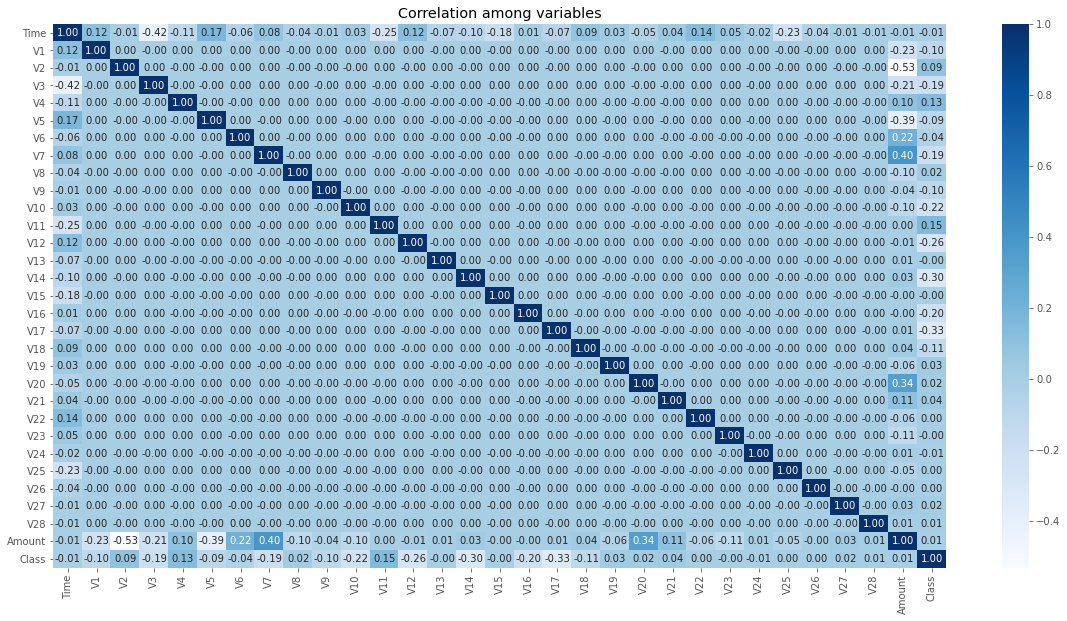

In [33]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation among variables')
plt.show()

#### Checking the porcetage of the missing values in order to know if it is necessary or not treat them

In [34]:
missing_data = df.isnull().sum()
percetage_missing_data = (missing_data / len(df['Time']))*100
percetage_missing_data

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

#### Ploting the distribution of feature "Class"

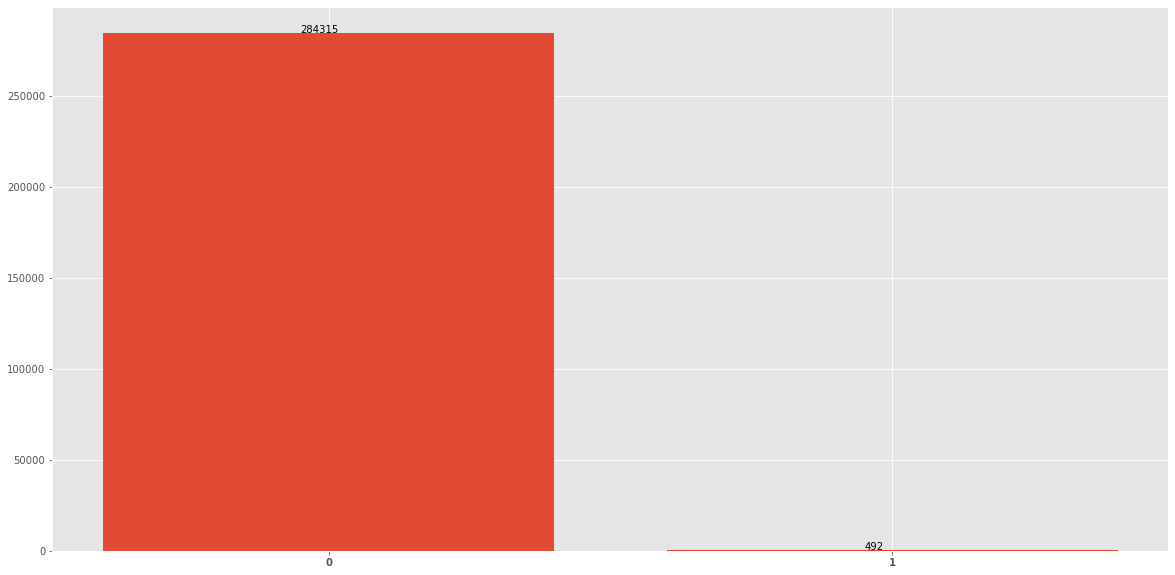

In [35]:
#Create axis
height = df.groupby('Class')['Class'].count().values
bars = df.groupby('Class')['Class'].count().index
y_pos = np.arange(len(bars))

#Create bars
plt.bar(y_pos, height)

#Create texts in chart
for i in range (0,len(y_pos)):
    plt.text(x = i -0.05, y = height[i], s = height[i], size = 10)
    
#Create names on the x-axis
plt.xticks(y_pos, bars, fontweight='bold', fontsize='10')

#Show graphic
plt.show()

###### Total rows in the dataset with fraud and non-fraud.


###### As we have a very unbalanced dateset (image above) it is necessary to balance the data to create the Machine Learning model.

###### The base has about 492 cases of fraud, so we will select that same number of normal transaction lines and create a balanced dataset (or take a sample).

In [36]:
#Get 492 values of each Class (0 and 1)
df_balanced = pd.concat([df[df['Class'] ==0][0:492], df[df['Class']==1][0:492]])

###### Separating the dateset between training base (X) and target (y).

In [37]:
# Apply x and y to train model
y = df_balanced['Class']
X = df_balanced.drop(['Class'], axis=1)

#### Training and testing the model

In [38]:
#Creating the model
model = RandomForestClassifier(n_estimators=10, n_jobs=-1)
kfold = KFold(n_splits=10)
result = cross_val_score(model,X,y,cv=kfold, n_jobs=-1)

#Accuracy
print(result.mean())

0.996938775510204


### Conclusion

###### Although the dataset omits the information in its raw form, this is not an impediment to creating the predictive model. This dataset comes in a very user-friendly way to work with data, which makes some of the work of a data scientist a lot easier.